In [1]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

In [179]:
function price_discrim(p,g)
    n = length(p)
    result = zeros(n)
    ps = vcat([1], p)
    for i= 2:(n+1)
        result[i-1] = g(ps[i-1]) - g(ps[i])
    end
    return result
end

f1(p) = clamp(p,0, 1)
u1(p,g) = p.*(price_discrim(p,g))
price_discrim([.9,.7,.5,.4],f1,.6)
#println(u1([.9,.7,.5,.4], f1, .6))

4-element Array{Float64,1}:
 0.09999999999999998
 0.20000000000000007
 0.19999999999999996
 0.09999999999999998

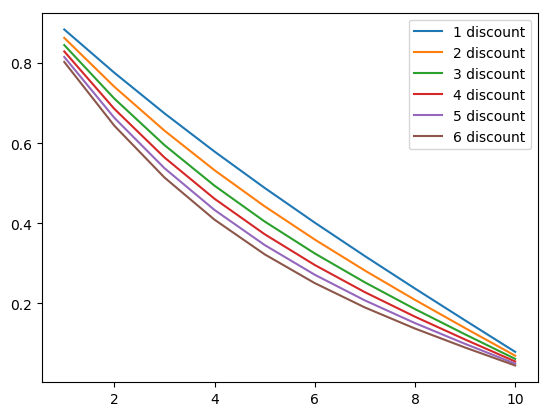

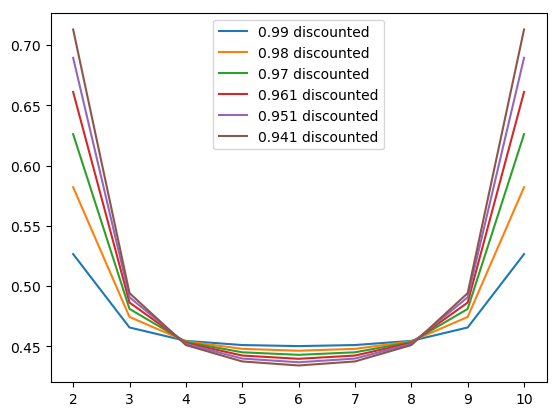

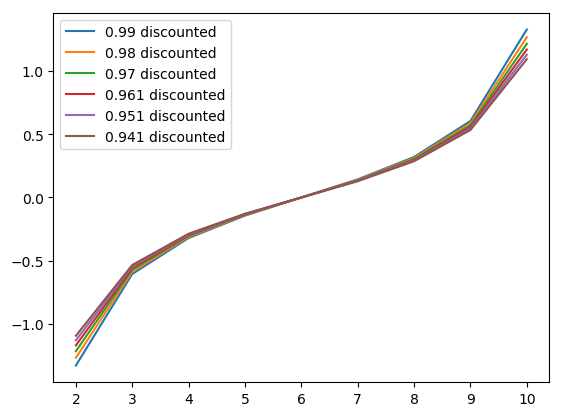

In [192]:
function create_plot(n,l,u,g,beta)
    p0 = ones(n) - (1/n*collect(1:n))
    #p0 = zeros(n)
    xs = collect( 1:n )
    
    for i=1:l
        delta = beta^i
        obj(p) = -1*sum( (delta*ones(length(p))).^collect(1:length(p)) .*u1(p,g) )
        res = optimize(obj,p0)
        ps = res.minimizer
        xs = collect( 1:length(ps) )
        figure(1)
        plot(xs, ps, label="$(i) discount")
        
        trans =  fft(ps)
        figure(2)
        plot(xs[2:end], real.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
        
        figure(3)
        plot(xs[2:end], imag.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
    end
    
    figure(1)
    legend()
    show()
    savefig("results2.png")
    
    figure(2)
    legend()
    show()
    savefig("results2.png")
    
    figure(3)
    legend()
    show()
    savefig("results2.png")
end

BETA = .99
f1(p) = clamp(p,0, 1)
u1(p,g,delta) = p.*(price_discrim(p,g,delta))

create_plot(10,6,u1,f1,BETA)
